In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.cluster import KMeans


%matplotlib inline

In [5]:
import matplotlib as PLT
PLT.rcParams.update({'figure.max_open_warning': 0})
PLT.rcParams.update({'font.size': 15})

PLT.rcParams['axes.linewidth'] = 2

PLT.rcParams['xtick.major.size'] = 3
PLT.rcParams['xtick.major.width'] = 2

PLT.rcParams['ytick.major.size'] = 3
PLT.rcParams['ytick.major.width'] = 2

## generate and visualize distribution

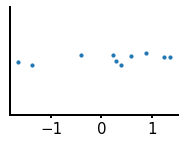

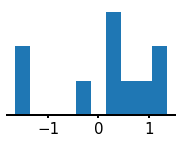

In [51]:
K=10

#scatter plot
################################################
fig=plt.figure(figsize=(3,2))
#random scatter for y axis
norm=normal(0,0.1,K)
    
#example distributions    
#rand_sample=uniform(0,1,K)
#rand_sample=exponential(5,K)
rand_sample=normal(0,1,K)
plt.scatter(rand_sample,norm,s=10)
    
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim([-1,1])
plt.yticks([])
    

    
#histogram
################################################
fig=plt.figure(figsize=(3,2))
plt.hist(rand_sample)

ax=plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.show()



## LLN in visualization

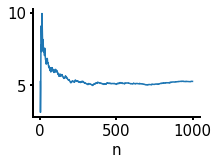

In [18]:
mmean=[]
rand_sample=[]
N=1000

for K in np.arange(1,N):
   
    #tmp=uniform(0,1)
    #tmp=normal(0,1)
    tmp=exponential(5)
    rand_sample.append(tmp)
    mmean.append(np.mean(rand_sample))  

    
fig=plt.figure(figsize=(3,2))
plt.plot(np.arange(1,N),mmean)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('n')
plt.show()
    

## Visualization of log normal distribution generation, or CLT

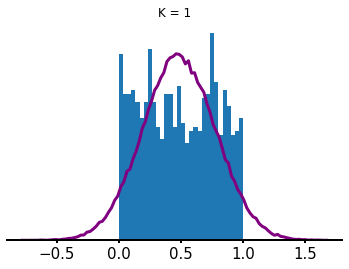

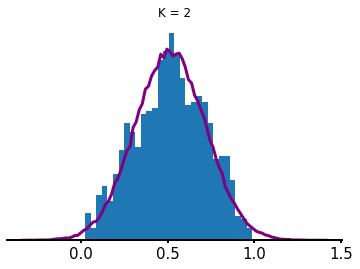

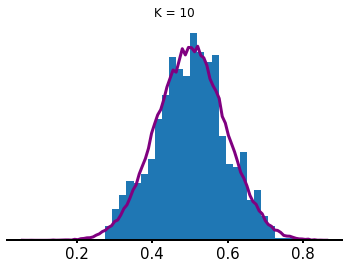

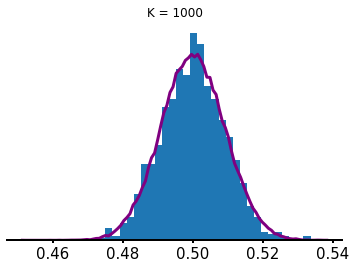

In [53]:
N=1000

for K in [1,2,10,1000]:
    
    mean_rand_sample=pd.Series([],dtype=float)
    for i in np.arange(0,N):
        rand_sample=uniform(0,1,K)
        mean_rand_sample[i]=np.mean(rand_sample)
    plt.hist(mean_rand_sample,bins=30,density=True);
    ax=plt.gca()
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    plt.title('K = '+str(K),fontsize=12)
    plt.yticks([])
    
    M=np.mean(mean_rand_sample)
    S=np.std(mean_rand_sample)
    n,x=np.histogram(normal(M,S,100000),density=True,bins=100)
    bin_centers = 0.5*(x[1:]+x[:-1])
    plt.plot(bin_centers,n,color='purple',linewidth=3)
    plt.show()

## Visualization of log normal distribution generation

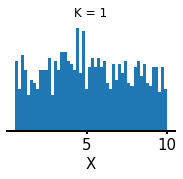

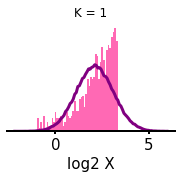

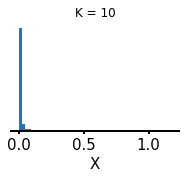

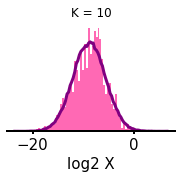

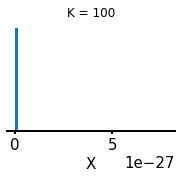

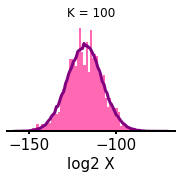

In [38]:
for K in [1,10,100]:

    
    mean_rand_sample=pd.Series([],dtype=float)
    product_rand_sample=10
    for i in np.arange(0,K):
        x=uniform(1,0.05,1000)
        #x=normal(1,0.1,1000)
        product_rand_sample=product_rand_sample*x
        
        
    fig=plt.figure(figsize=(3,2))    
    plt.hist(product_rand_sample,bins=50,density=True);
    ax=plt.gca()
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    plt.title('K = '+str(K),fontsize=12)
    plt.yticks([])  
    plt.xlabel('X')
    plt.show()
    
    
    fig=plt.figure(figsize=(3,2))
    plt.hist(np.log2(product_rand_sample),bins=50,density=True,color='hotpink');
    
    ax=plt.gca()
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    plt.title('K = '+str(K),fontsize=12)
    plt.yticks([])  
    plt.xlabel('log2 X')
    
    M=np.mean(np.log2(product_rand_sample))
    S=np.std(np.log2(product_rand_sample))
    n,x=np.histogram(normal(M,S,100000),density=True,bins=100)
    bin_centers = 0.5*(x[1:]+x[:-1])
    plt.plot(bin_centers,n,color='purple',linewidth=3)
    plt.show()

## Insulin dataset

In [42]:
df=pd.read_csv('/home/anna/PROJECTS2025/StatDatAnLAB/diabetes.csv')
var=df['Insulin'].copy()
var[var==0]=np.nan

([], [])

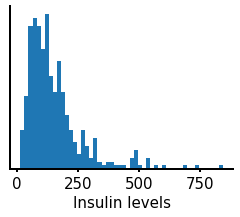

In [43]:
fig=plt.figure(figsize=(4,3))
plt.hist(var,bins=50,density=True);
ax=plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.xlabel('Insulin levels')
plt.yticks([])

([], [])

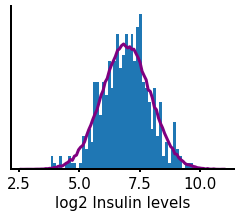

In [44]:
fig=plt.figure(figsize=(4,3))
plt.hist(np.log2(var),bins=50,density=True);
ax=plt.gca()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.xlabel('log2 Insulin levels')

M=np.mean(np.log2(var))
S=np.std(np.log2(var))
n,x=np.histogram(normal(M,S,100000),density=True,bins=100)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n,color='purple',linewidth=3)
plt.yticks([])

## height dataset

In [47]:
df=pd.read_csv('/home/anna/PROJECTS2025/StatDatAnLAB/SOCR-HeightWeight.csv',index_col=0)

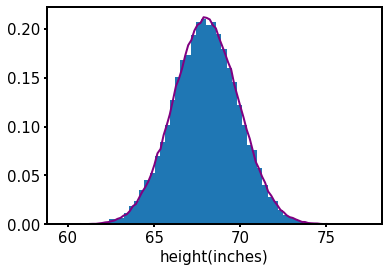

In [48]:
plt.hist(df['Height(Inches)'],bins=50,density=True);
plt.xlabel('height(inches)')

    
n,x=np.histogram(normal(df['Height(Inches)'].mean(),df['Height(Inches)'].std(),200000),
                 density=True,bins=100)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n,color='purple',linewidth=2)
plt.show()